# Data Acquisition
Task: Fetch historical exchange rate data for the major forex pair USD/TRY using an API or downloading the data from a website.
Data should include past 5-10 years, and add any other macroeconomic factors you feel are relevant.


In [ ]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime

In [ ]:
ex = yf.Ticker("TRYUSD=X")
df = ex.history(period="10y")

ERROR:yfinance:Failed to get ticker 'TRYUSD=X' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:$TRYUSD=X: possibly delisted; no price data found  (period=10y)


In [ ]:
print(df.index)

Index([], dtype='object', name='Date')


In [ ]:
start_date = df.index.min().date()
end_date = df.index.max().date()

indicators = {
    'US_CPI': 'CPIAUCNS',
    'US_GDP': 'GDP',
    'US_IR': 'FEDFUNDS',
    'TURKEY_CPI': 'TURCPIALLMINMEI',
    'TURKEY_IR': 'IRSTCI01TRM156N'
}

macro_df = pd.DataFrame()

for key, value in indicators.items():
    macro_data = pdr.get_data_fred(value, start=start_date, end=end_date)
    macro_data = macro_data.rename(columns={value: key})

    if macro_data.index.tz is None:
        macro_data.index = macro_data.index.tz_localize('UTC')
    else:
        macro_data.index = macro_data.index.tz_convert('UTC')

    macro_df = pd.concat([macro_df, macro_data], axis=1)

    macro_df.fillna(method='ffill', inplace=True)
    macro_df.fillna(method='bfill', inplace=True)

AttributeError: 'float' object has no attribute 'date'

In [ ]:
df = df.join(macro_df, how='outer')

df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

<ipython-input-56-f196690bbbeb>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-56-f196690bbbeb>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
df = df.drop('Volume', axis = 1)
df = df.drop('Stock Splits', axis = 1)
df = df.drop('Dividends', axis = 1)

In [ ]:
df

,Open,High,Low,Close,US_CPI,US_GDP,US_IR,TURKEY_CPI,TURKEY_IR
2014-10-01 23:00:00+00:00,2.283220,2.283960,2.267190,2.283220,236.151,18063.529,0.09,95.48516,7.5
2014-10-02 23:00:00+00:00,2.267270,2.305720,2.267080,2.267270,236.151,18063.529,0.09,95.48516,7.5
2014-10-05 23:00:00+00:00,2.293320,2.293340,2.269780,2.293320,236.151,18063.529,0.09,95.48516,7.5
2014-10-06 23:00:00+00:00,2.267070,2.278100,2.263370,2.266580,236.151,18063.529,0.09,95.48516,7.5
2014-10-07 23:00:00+00:00,2.274190,2.293440,2.273410,2.274070,236.151,18063.529,0.09,95.48516,7.5
...,...,...,...,...,...,...,...,...,...
2024-09-24 23:00:00+00:00,34.112301,34.154831,34.094261,34.112301,314.796,29016.714,5.13,941.47400,47.0
2024-09-25 23:00:00+00:00,34.160709,34.171509,34.114300,34.160709,314.796,29016.714,5.13,941.47400,47.0
2024-09-26 23:00:00+00:00,34.175400,34.190720,34.133598,34.175400,314.796,29016.714,5.13,941.47400,47.0
2024-09-29 23:00:00+00:00,34.149059,34.200111,34.134480,34.149059,314.796,29016.714,5.13,941.47400,47.0


# Exploratory Data Analysis
Task: Perform EDA to understand the characteristics of the data.
Plot the historical price series, calculate daily log returns, and make visualizations. Examine correlations with macroeconomic indicators.


## Exchange Rate over Time

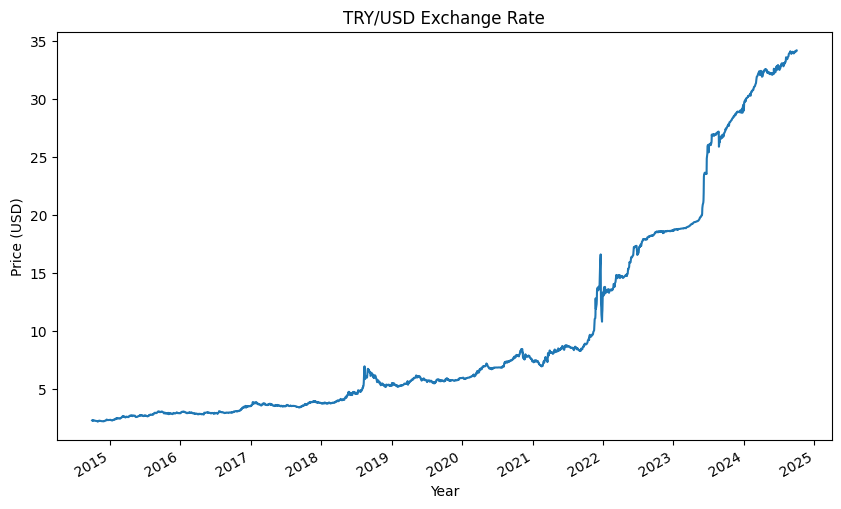

In [ ]:
import matplotlib.pyplot as plt

df['Close'].plot(figsize=(10,6), title='TRY/USD Exchange Rate')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.show()

## Log Returns

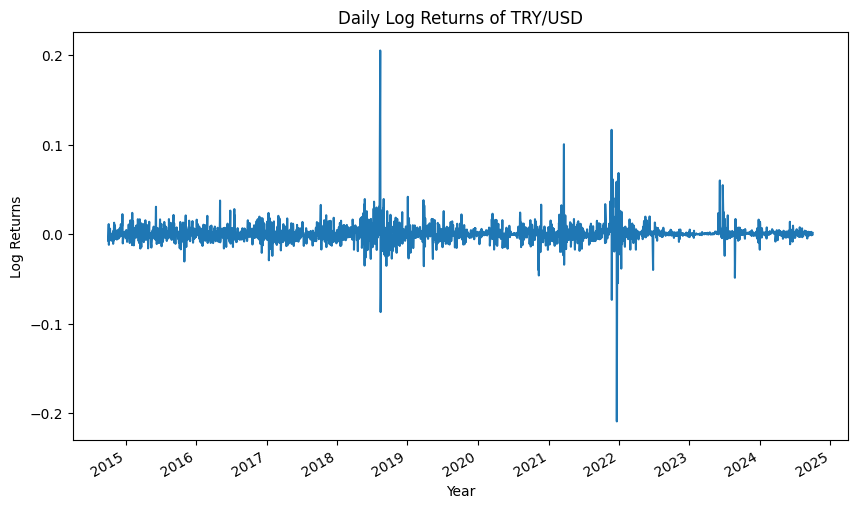

In [ ]:
import numpy as np

df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['Log_Returns'].plot(figsize=(10,6), title='Daily Log Returns of TRY/USD')
plt.xlabel('Year')
plt.ylabel('Log Returns')
plt.show()

## Moving Averages

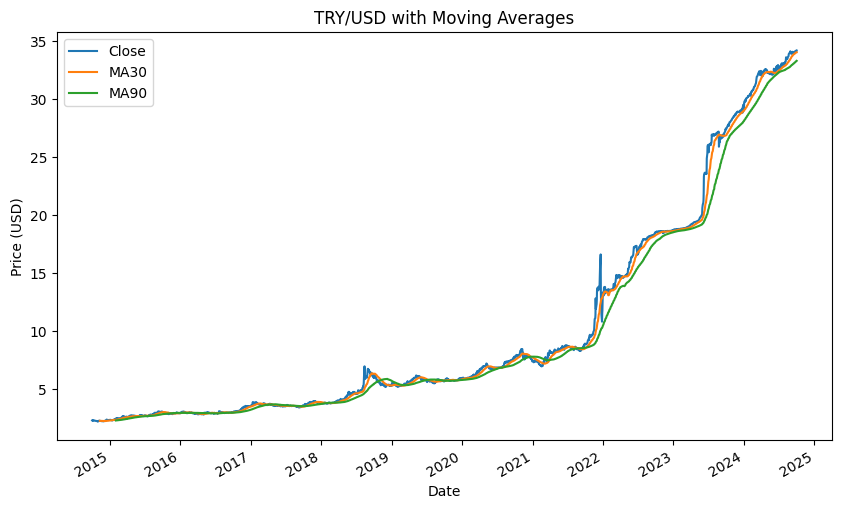

In [ ]:
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA90'] = df['Close'].rolling(window=90).mean()

df[['Close', 'MA30', 'MA90']].plot(figsize=(10,6), title='TRY/USD with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

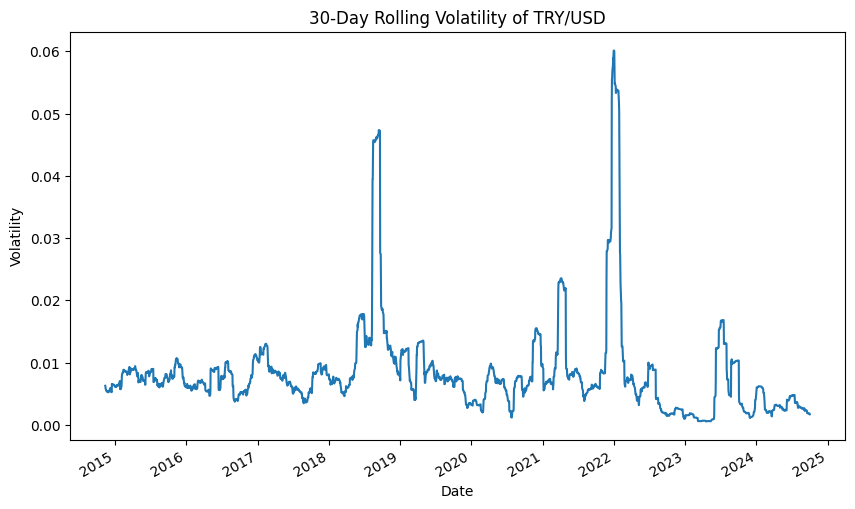

In [ ]:
df['Volatility'] = df['Log_Returns'].rolling(window=30).std()
df['Volatility'].plot(figsize=(10,6), title='30-Day Rolling Volatility of TRY/USD')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

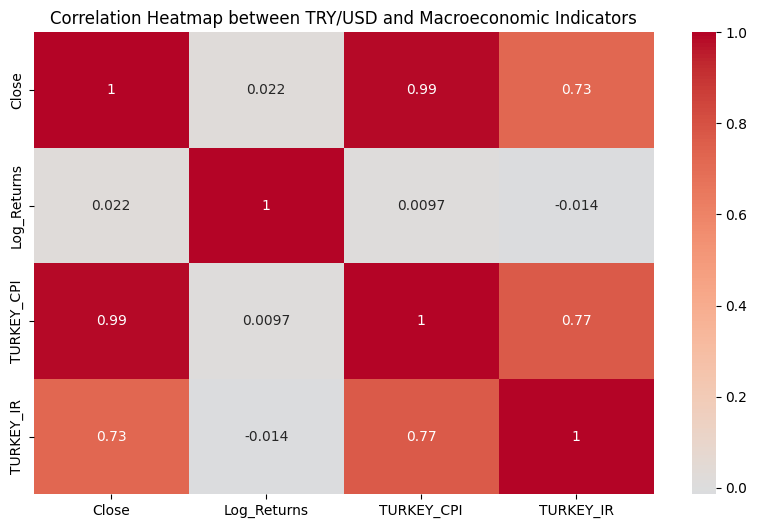

In [ ]:
import seaborn as sns

correlation_data = df[['Close', 'Log_Returns', 'TURKEY_CPI', 'TURKEY_IR']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between TRY/USD and Macroeconomic Indicators')
plt.show()

# Volatility Measurement
Task: Calculate and visualize different measures of volatility.

Historical Volatility: Compute the standard deviation of daily log returns over various rolling windows (e.g., 20, 50, and 100 days).

EWMA Volatility: Implement exponentially weighted moving average volatility with different decay factors.

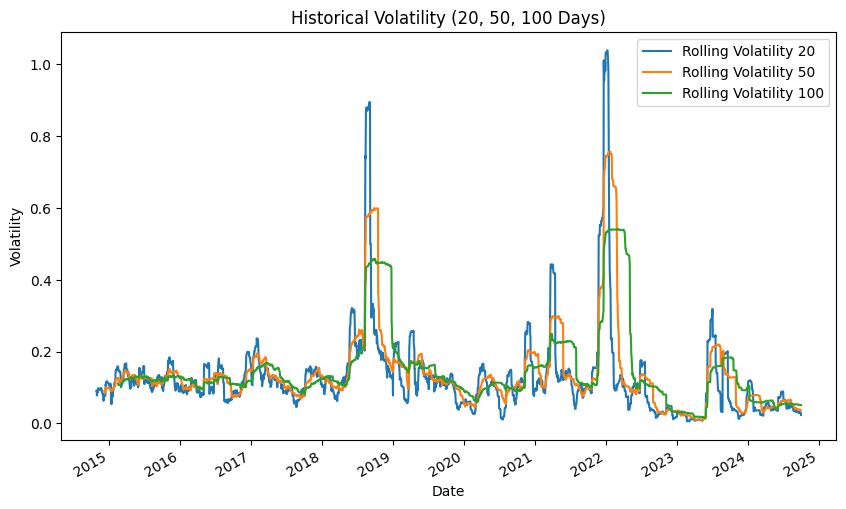

In [ ]:
df['Log Returns'] = np.log(df['Close'] / df['Close'].shift(1))

rolling_windows = [20, 50, 100]

for window in rolling_windows:
    df[f'Rolling Volatility {window}'] = df['Log Returns'].rolling(window=window).std() * np.sqrt(252)

df[['Rolling Volatility 20', 'Rolling Volatility 50', 'Rolling Volatility 100']].plot(figsize=(10, 6), title='Historical Volatility (20, 50, 100 Days)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

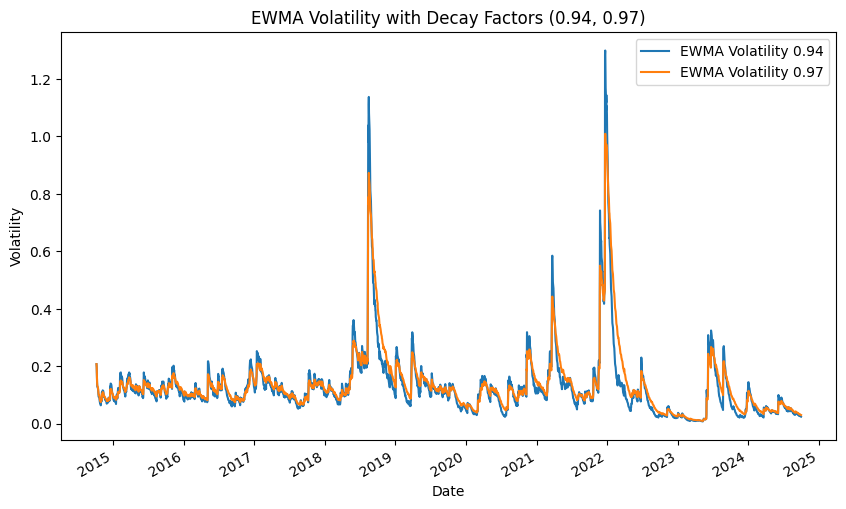

In [ ]:
decay_factors = [0.94, 0.97]

for decay in decay_factors:
    df[f'EWMA Volatility {decay}'] = df['Log Returns'].ewm(span=(1/(1-decay))).std() * np.sqrt(252)

df[[f'EWMA Volatility {decay}' for decay in decay_factors]].plot(figsize=(10, 6), title='EWMA Volatility with Decay Factors (0.94, 0.97)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Volatility Modeling
Task: Develop and fit advanced volatility models.

GARCH Model: Fit a GARCH(1,1) model to the currency pair data. Evaluate model performance using statistical metrics.


In [ ]:
!pip install arch

In [ ]:
from arch import arch_model
from sklearn.preprocessing import StandardScaler

df['Log Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['Log Returns'] = df['Log Returns'].dropna()
returns = df['Log Returns']

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.085e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.085e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarn

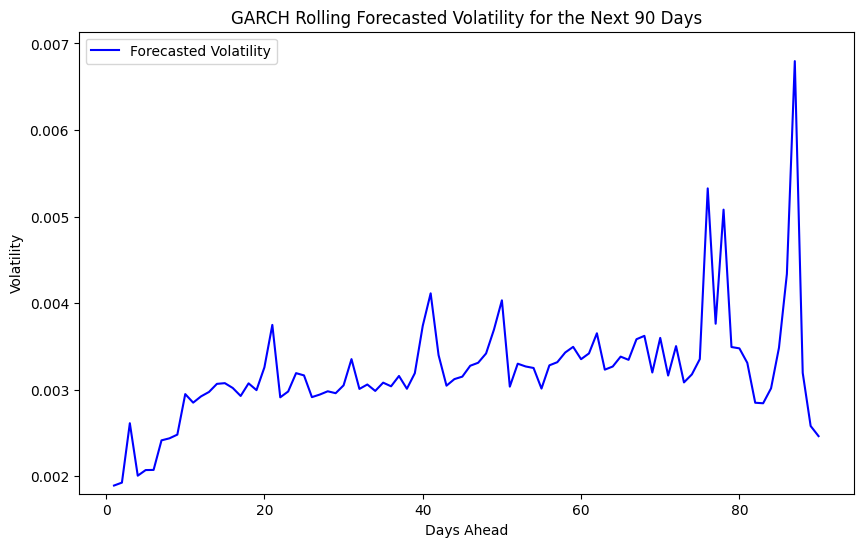

In [ ]:
forecast_horizon = 90
rolling_forecast_vol = []

window_size = 90

for i in range(forecast_horizon):
    window_data = returns[-(window_size + i):-i] if i > 0 else returns[-window_size:]

    garch_model = arch_model(window_data, vol='Garch', p=1, q=1)
    garch_fit = garch_model.fit(disp='off')

    forecast = garch_fit.forecast(horizon=1)
    rolling_forecast_vol.append(np.sqrt(forecast.variance.values[-1][0]))

forecast_df = pd.DataFrame({
    'Days Ahead': np.arange(1, len(rolling_forecast_vol) + 1),
    'Forecasted Volatility': rolling_forecast_vol
})

plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Days Ahead'], forecast_df['Forecasted Volatility'], label='Forecasted Volatility', color='blue')

plt.title('GARCH Rolling Forecasted Volatility for the Next 90 Days')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility')
plt.legend()

plt.ylim(min(forecast_df['Forecasted Volatility']) * 0.95, max(forecast_df['Forecasted Volatility']) * 1.05)
plt.show()

In [ ]:
aic = garch_fit.aic
bic = garch_fit.bic
log_likelihood = garch_fit.loglikelihood

print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'Log-Likelihood: {log_likelihood}')

AIC: -803.4381047834542
BIC: -793.438866102133
Log-Likelihood: 405.7190523917271


# Volatility Forecasting
Task: Generate out-of-sample volatility forecasts for the next 30, 60, and 90 days using the models.
Plot forecasted volatility against realized volatility over these periods to assess forecasting accuracy.

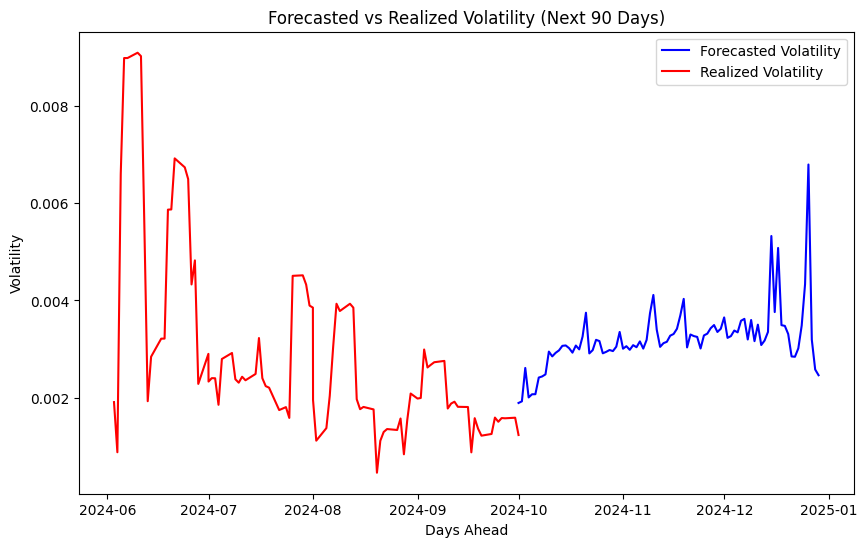

In [ ]:
last_date = returns.index[-1]
forecast_index = pd.date_range(last_date, periods=forecast_horizon, freq='D')

window_size = 5
df['Realized Volatility'] = returns.rolling(window=window_size).std()

df['Realized Volatility'] = returns.rolling(window=window_size).std()
realized_vol_df = df[['Realized Volatility']].dropna().iloc[-forecast_horizon:]

plt.figure(figsize=(10, 6))
plt.plot(forecast_index, rolling_forecast_vol, label='Forecasted Volatility', color='blue')
plt.plot(realized_vol_df.index, realized_vol_df['Realized Volatility'], label='Realized Volatility', color='red')
plt.title('Forecasted vs Realized Volatility (Next 90 Days)')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Trading Strategy Based on Volatility
Task: Develop a volatility-based forex trading strategy
Volatility Breakout Strategy: Buy or sell the currency pair when the predicted volatility exceeds a certain threshold, assuming larger price movements.


In [ ]:
df['Predicted Volatility'] = pd.Series(rolling_forecast_vol, index=df.index[-forecast_horizon:])
threshold_volatility = df['Predicted Volatility'].quantile(0.05)
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()
df['Buy Signal'] = (df['Predicted Volatility'] > threshold_volatility) | (df['SMA50'] > df['SMA200'])
df['Sell Signal'] = (df['Predicted Volatility'] < df['Predicted Volatility'].shift(1)) & (df['Log Returns'] < 0)
df['Exit Signal'] = (df['Predicted Volatility'] < df['Predicted Volatility'].quantile(0.05)) | ((df['SMA50'] < df['SMA200']) & (df['Log Returns'] > 0))
df['MA Buy Signal'] = (df['SMA50'] > df['SMA200'])
df['MA Sell Signal'] = (df['SMA50'] < df['SMA200'])
df['Buy Signal'] = df['Buy Signal'] & df['MA Buy Signal']
df['Sell Signal'] = df['Sell Signal'] & df['MA Sell Signal']
df['Position'] = 0

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Position'].iloc[i] = 0
<ipython-input-72-1fddc1aaa6cf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[i] = 0
<ipython-input-72-1fddc1aaa6cf>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting value

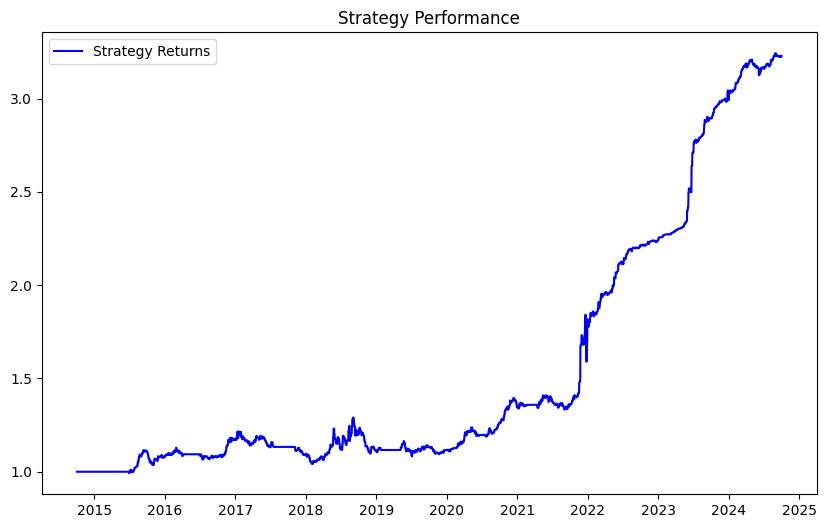

In [ ]:
position = 0

for i in range(1, len(df)):
    if df['Buy Signal'].iloc[i] and df['Position'].iloc[i-1] == 0:
        df['Position'].iloc[i] = 1
        entry_price = df['Close'].iloc[i]

    elif df['Sell Signal'].iloc[i] and df['Position'].iloc[i-1] == 0:
        df['Position'].iloc[i] = -1
        entry_price = df['Close'].iloc[i]

    elif df['Position'].iloc[i-1] == 1:
        if (df['Close'].iloc[i] <= entry_price) or (df['Close'].iloc[i] >= entry_price):
            df['Position'].iloc[i] = 0
        elif df['Exit Signal'].iloc[i]:
            df['Position'].iloc[i] = 0

    elif df['Position'].iloc[i-1] == -1:
        if (df['Close'].iloc[i] >= entry_price) or (df['Close'].iloc[i] <= entry_price):
            df['Position'].iloc[i] = 0
        elif df['Exit Signal'].iloc[i]:
            df['Position'].iloc[i] = 0

    else:
        df['Position'].iloc[i] = df['Position'].iloc[i-1]

df['Returns'] = df['Close'].pct_change()
df['Strategy Returns'] = df['Position'].shift(1) * df['Returns']
df['Cumulative Strategy Returns'] = (1 + df['Strategy Returns']).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Cumulative Strategy Returns'], label='Strategy Returns', color='blue')
plt.title('Strategy Performance')
plt.legend()
plt.show()

# Performance Evaluation
Task: Evaluate the strategy’s performance using financial metrics such as: Sharpe ratio, Sortino ratio, Maximum Drawdown, Annualized Volatility, and PnL.

In [ ]:
df['Daily Returns'] = df['Close'].pct_change()

risk_free_rate = 0.01
excess_returns = df['Daily Returns'] - risk_free_rate / 252
sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)

downside_returns = excess_returns[excess_returns < 0]
sortino_ratio = np.mean(excess_returns) / np.std(downside_returns)
df['Cumulative Returns'] = (1 + df['Daily Returns']).cumprod()
rolling_max = df['Cumulative Returns'].cummax()
drawdown = (rolling_max - df['Cumulative Returns']) / rolling_max
max_drawdown = drawdown.max()
annualized_volatility = np.std(df['Daily Returns']) * np.sqrt(252)

pnl = df['Cumulative Returns'].iloc[-1] - 1

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Sortino Ratio: {sortino_ratio}')
print(f'Maximum Drawdown: {max_drawdown}')
print(f'Annualized Volatility: {annualized_volatility}')
print(f'Profit and Loss: {pnl}')

Sharpe Ratio: 0.09030040234630718
Sortino Ratio: 0.11398773256277733
Maximum Drawdown: 0.3493236994637851
Annualized Volatility: 0.18167181878257202
Profit and Loss: 13.98059660300362
